# Modelo de Parcial III

In [37]:
%matplotlib inline
from __future__ import division
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import newton, minimize_scalar, minimize
from sympy import *

## Pregunta 1

Considere la función $f(x,y)$ encuentre:

1. La grafica de la función 
2. Las derivadas parciales de $f$
3. Los puntos criticos de la función

$$
f(x,y) = x^4 + y^4 - 4xy + 1
$$

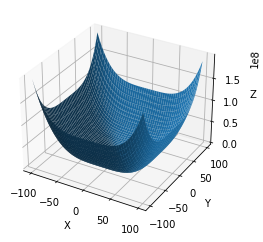

In [2]:
# Parte 1
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def f(x,y):
    return x**4 + y**4 - 4*x*y + 1

# Definimos valores x, y para calcular z
x = y = np.arange(-100.0, 100.0, 1)
X, Y = np.meshgrid(x, y)
z = np.array(f(np.ravel(X), np.ravel(Y)))
Z = z.reshape(X.shape)

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [9]:
# Parte 2
x, y = symbols('x y', real=True)

f = x**4 + y**4 - 4*x*y + 1

fx = diff(f, x)
fy = diff(f, y)
print('Derivadas Parciales de 1er orden:')
pprint(fx)
print('')
pprint(fy)

Derivadas Parciales de 1er orden:
   3      
4⋅x  - 4⋅y

          3
-4⋅x + 4⋅y 


In [10]:
# Parte 3
pprint(solve([
    Eq(fx, 0),
    Eq(fy, 0)
], [x,y]))

[(-1, -1), (0, 0), (1, 1)]


## Pregunta 2

Considere la función $g(x)$ encuentre:

1. La primera derivada de g(x)
2. Los puntos críticos, utilizando el método de Newton-Raphson
3. Gráfique dichos puntos y a la función

$$
g(x)= \cos(x^2 - x) - x^4
$$

In [31]:
# Parte 1
x = Symbol('x', real=True)

g = cos(x**2 - x) - x**4

pprint(diff(g))

     3                ⎛ 2    ⎞
- 4⋅x  - (2⋅x - 1)⋅sin⎝x  - x⎠


In [32]:
# Parte 2
def g(x):
    return np.cos(x**2 - x) - x**4

root = newton(g, 2)

print(root)

1.0


Text(1.5, 1.0, '$x_0$=1.0')

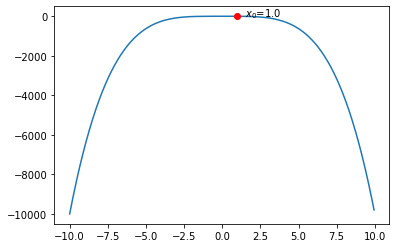

In [34]:
# Parte 3
x = np.arange(-10, 10, 0.05)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, g(x))
ax.plot(root, g(root), 'or')
plt.annotate(f"$x_0$={round(root, 2)}", (root+0.5, g(root)+1))

## Pregunta 3

Considere a la función $f(\mathbf{x})$ y las restricciones $g(\mathbf{x})$ determine:

1. sus puntos críticos con el método:
1. Lagrangiano
2. Númerico

2. Determine si hay diferencia entre los resultados e indique por se puede dar

$$
f(x_1,x_2,x_3) = x_1^2 + x_2^2 + x_3^2 
$$
s.a

$$
g_1(x_1,x_2,x_3) = x_1 - x_2 - 1 \\[8 pt]
g_2(x_1,x_2,x_3) = x_2^2 - x_3^2 - 1
$$

In [48]:
# Parte 1.1
x_1, x_2, x_3, lambda_1, lambda_2 = symbols('x_1 x_2 x_3 lambda_1 lambda_2', real=True)

L = x_1**2 +  x_2**2 + x_3**2 - lambda_1*(x_1 - x_2 - 1) - lambda_2*(x_2**2 - x_3**2 - 1)

result = solve([
    Eq(diff(L, x_1), 0),
    Eq(diff(L, x_2), 0),
    Eq(diff(L, x_3), 0),
    Eq(diff(L, lambda_1), 0),
    Eq(diff(L, lambda_2), 0),
], [x_1, x_2, x_3, lambda_1, lambda_2])

pprint(result)

[(0, -1, 0, 0, 1), (2, 1, 0, 4, 3)]


In [49]:
# Parte 1.2
def f(params):
    x_1, x_2, x_3 = params
    return x_1**2 +  x_2**2 + x_3**2

def g_1(params):
    x_1, x_2, x_3 = params
    return x_1 - x_2 - 1

def g_2(params):
    x_1, x_2, x_3 = params
    return x_2**2 - x_3**2 - 1

x_0 = (1, 0, 0)

constraints = (
    {'type': 'eq', 'fun': g_1},
    {'type': 'eq', 'fun': g_2}
)

result = minimize(f, x_0, method='SLSQP', constraints=constraints)

print(result)

     fun: 6.329465640423627
     jac: array([ 4.31389266,  2.31389266, -1.16365719])
 message: 'Optimization terminated successfully'
    nfev: 48
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([ 2.15694617,  1.15694617, -0.58182853])


**Parte 2:**

## Pregunta 4

Considere la función $g(x,y)$ determine:

1. Gráfique la función y sus curvas de nivel
2. Determine el mínimo de la función utilizando el método del gradiente

$$
g(x,y) = x^2 - 2xy + 2y
$$

/var/folders/79/_4p1vgcs41jfkg4vwkngl3dr0000gn/T/ipykernel_40504/2171282468.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


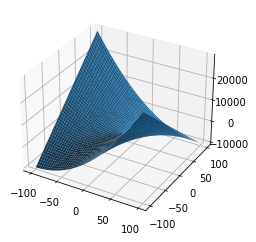

In [94]:
# Parte 1
def g(x):
    return x[0]**2 - 2*x[0]*x[1] + 2*x[1] 

def dg(x):
    return np.array([2*x[0] -2*x[1], -2*x[0] + 2])


fig = plt.figure()
ax = fig.gca(projection="3d")

xmesh, ymesh = np.mgrid[-100:100,-100:100]
fmesh = g(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh)

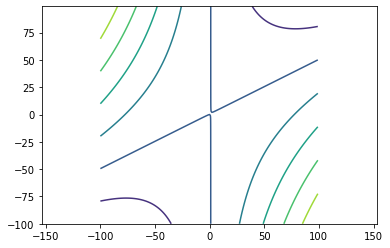

In [95]:
plt.axis("equal")
plt.contour(xmesh, ymesh, fmesh)

In [119]:
guesses = [np.array([1, 1])]

In [120]:
iters = 0

while iters < 10:
    x = guesses[-1]
    s = -dg(x)
    def f1d(alpha):
        return g(x + alpha*s)
    alpha_opt = minimize_scalar(f1d, bracket=(0, 1)).x
    next_guess = x + alpha_opt * s
    guesses.append(next_guess)
    iters += 1

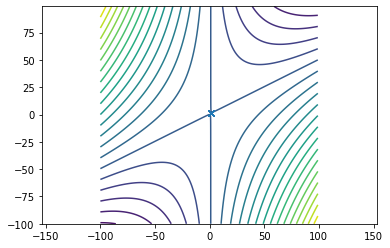

In [121]:
plt.axis("equal")
plt.contour(xmesh, ymesh, fmesh, 20)
it_array = np.array(guesses)
plt.plot(it_array.T[0], it_array.T[1], "x-")